## IMPORTAÇÃO DAS BIBLIOTECAS E DO BANCO DE DADOS

In [93]:
library(ggplot2)
library(corrplot)
library(reshape2)
library(rlang)

In [94]:
db_esforco <- read.csv('/home/useradd/Documentos/Heart-Failure-Data-Analysis/Heart-Failure-Data-Analysis/data/dados.csv', sep = ';')


In [95]:
db_esforco <- db_esforco[-nrow(db_esforco), ]


## SEPARAÇÃO DO BANCO DE DADOS EM DOIS GRUPOS:
 1. PACIENTES COM INSUFICIÊNCIA CARDÍACA
 2. PACIENTES DO GRUPO CONTROLE

In [96]:
# Substituindo as vírgulas por pontos na coluna VO2
db_esforco$VO2 <- gsub(",", ".", db_esforco$VO2)

# Convertendo a coluna VO2 para numérico
db_esforco$VO2 <- as.numeric(db_esforco$VO2)

In [97]:
dados_nyha <- db_esforco[db_esforco$NYHA != 0, ]  # Pacientes com insuficiência cardíaca
dados_controle <- db_esforco[db_esforco$NYHA == 0, ]  # Pacientes controle

In [98]:
# Função para converter colunas de chr para numérico, removendo pontos e substituindo vírgulas
converter_para_numero <- function(coluna) {
  coluna <- gsub("\\.", "", coluna)  # Remover todos os pontos
  coluna <- gsub(",", ".", coluna)    # Substituir vírgula por ponto, se houver
  suppressWarnings(as.numeric(coluna)) # Converter para numérico sem mostrar avisos
}

# Aplicar a função nas colunas relevantes
dados_nyha$Peso <- converter_para_numero(dados_nyha$Peso)
dados_nyha$Superfície.corporal <- converter_para_numero(dados_nyha$Superfície.corporal)
dados_nyha$IMC.1o.ERGOESP...kg.m2. <- converter_para_numero(dados_nyha$IMC.1o.ERGOESP...kg.m2.)
dados_nyha$VO2.FC..ml.bpm. <- converter_para_numero(dados_nyha$VO2.FC..ml.bpm.)
dados_nyha$VE.VO2 <- converter_para_numero(dados_nyha$VE.VO2)
dados_nyha$VE.VCO2 <- converter_para_numero(dados_nyha$VE.VCO2)
dados_nyha$TEMPO.DE.RAMPA <- suppressWarnings(as.numeric(dados_nyha$TEMPO.DE.RAMPA))

dados_controle$Peso <- converter_para_numero(dados_controle$Peso)
dados_controle$Superfície.corporal <- converter_para_numero(dados_controle$Superfície.corporal)
dados_controle$IMC.1o.ERGOESP...kg.m2. <- converter_para_numero(dados_controle$IMC.1o.ERGOESP...kg.m2.)
dados_controle$VO2.FC..ml.bpm. <- converter_para_numero(dados_controle$VO2.FC..ml.bpm.)
dados_controle$VE.VO2 <- converter_para_numero(dados_controle$VE.VO2)
dados_controle$VE.VCO2 <- converter_para_numero(dados_controle$VE.VCO2)
dados_controle$TEMPO.DE.RAMPA <- suppressWarnings(as.numeric(dados_controle$TEMPO.DE.RAMPA))


## GRÁFICOS DE DISPERSÃO

In [99]:
criar_grafico <- function(dados, x, y, grupo, titulo) {
  ggplot(dados, aes(x = !!sym(x), y = !!sym(y), color = !!sym(grupo))) +
    geom_point() +
    labs(title = titulo, x = x, y = y) +
    theme_minimal()
}

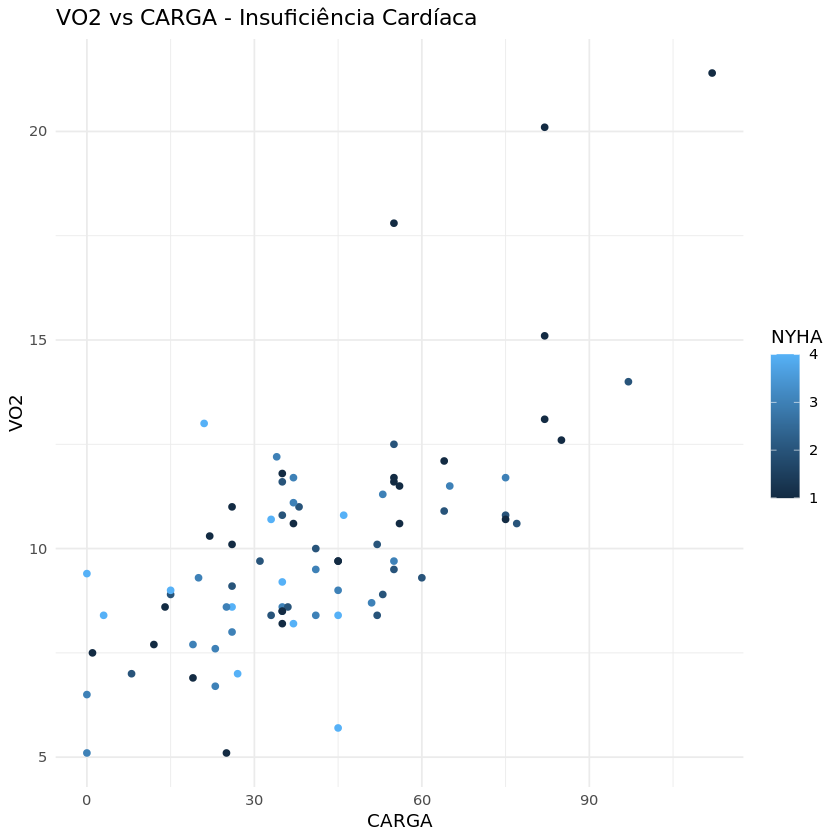

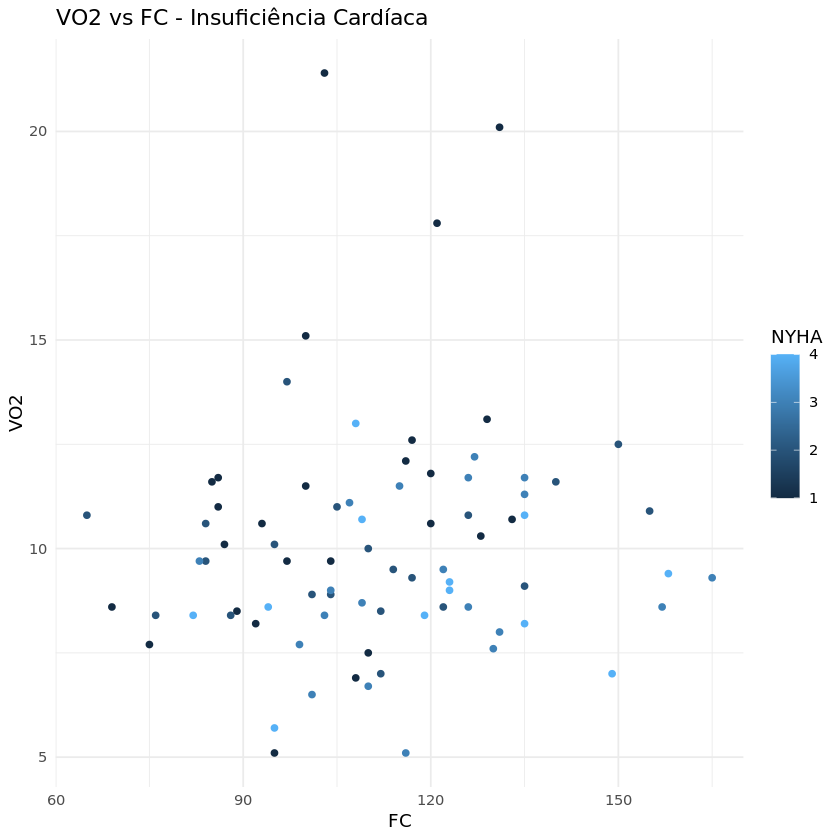

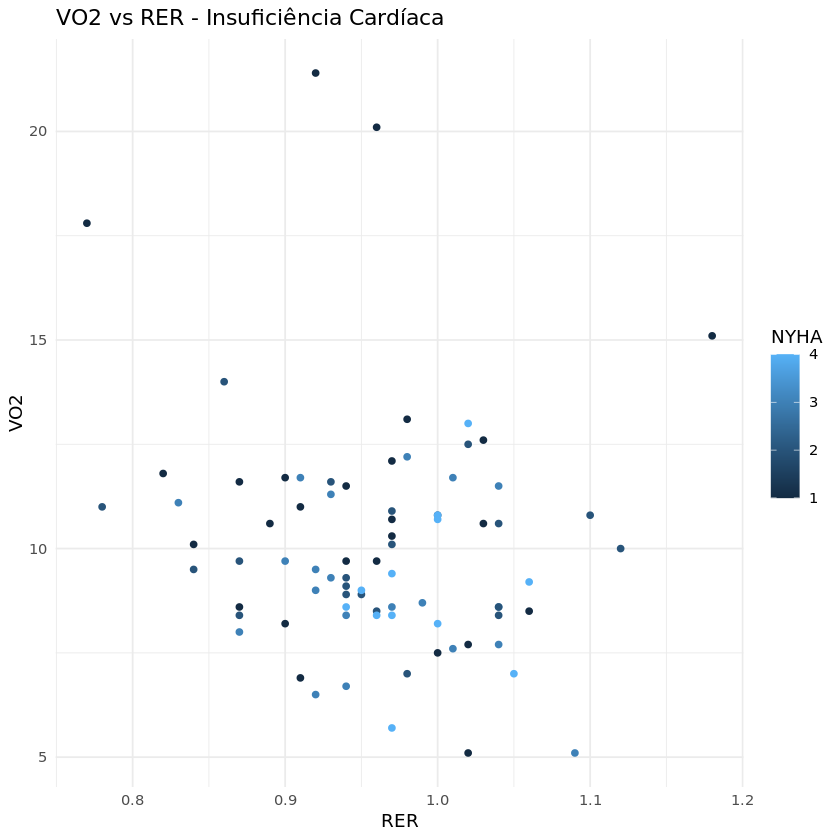

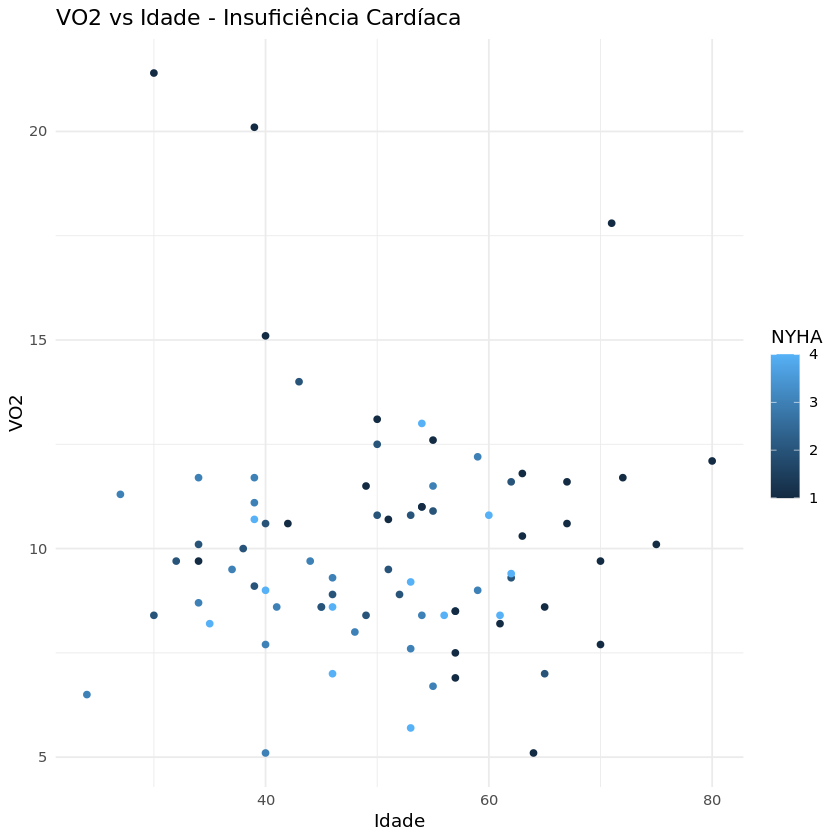

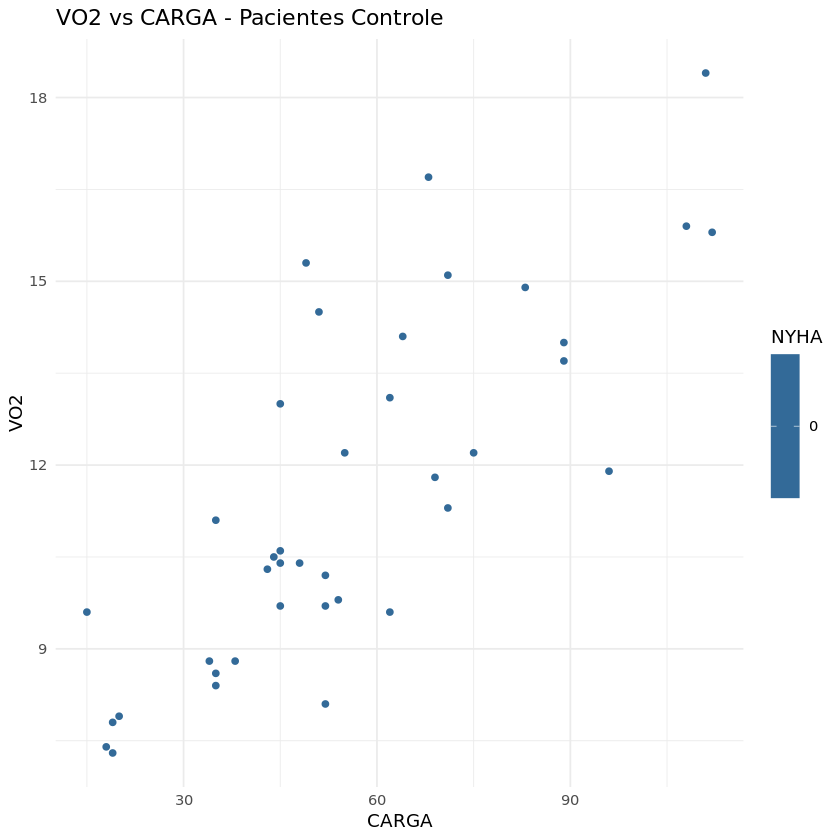

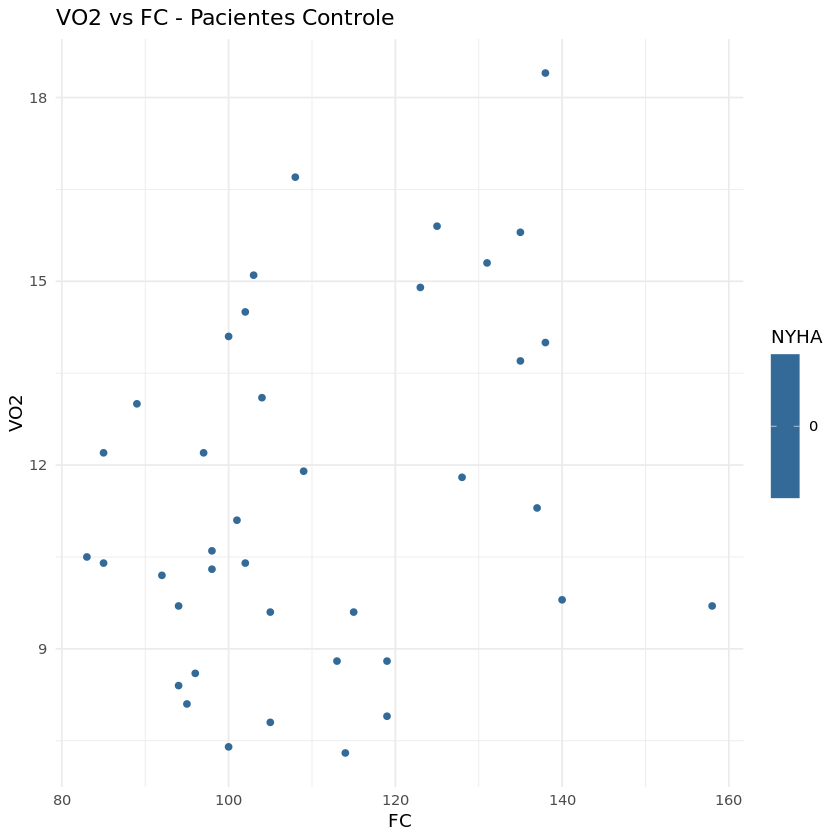

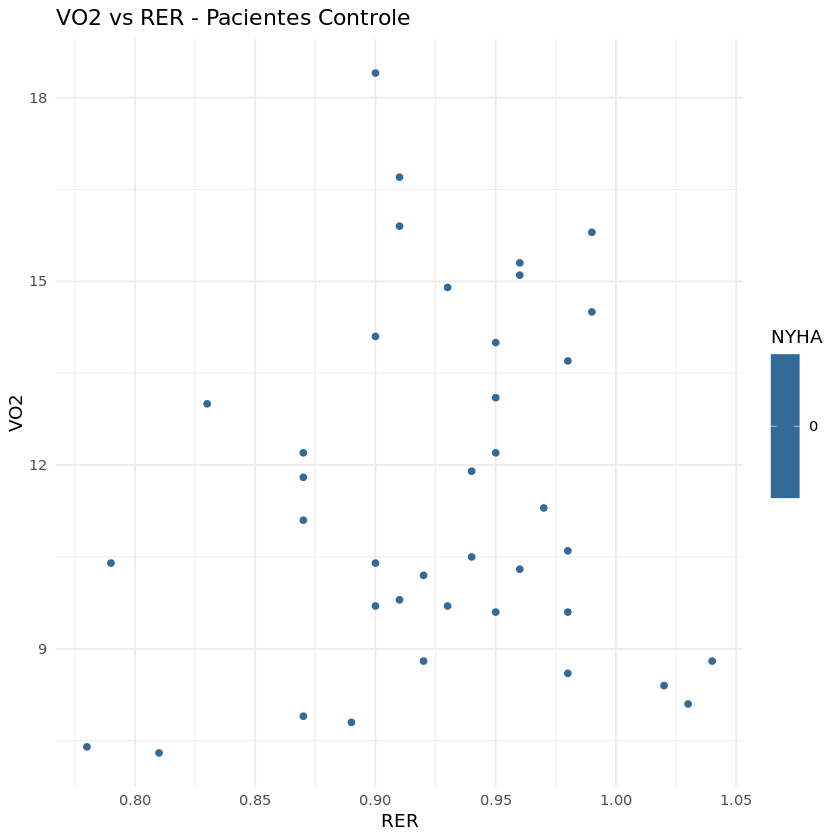

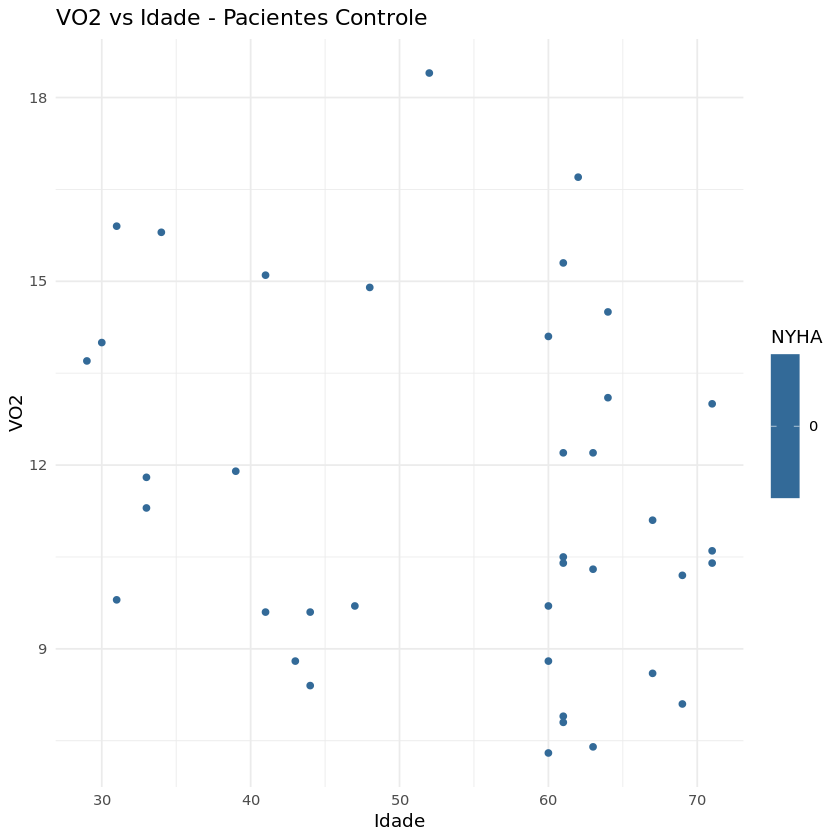

In [100]:
# Gráficos para Pacientes com Insuficiência Cardíaca
gg1 <- criar_grafico(dados_nyha, "CARGA", "VO2", "NYHA", "VO2 vs CARGA - Insuficiência Cardíaca")
gg2 <- criar_grafico(dados_nyha, "FC", "VO2", "NYHA", "VO2 vs FC - Insuficiência Cardíaca")
gg3 <- criar_grafico(dados_nyha, "RER", "VO2", "NYHA", "VO2 vs RER - Insuficiência Cardíaca")
gg4 <- criar_grafico(dados_nyha, "Idade", "VO2", "NYHA", "VO2 vs Idade - Insuficiência Cardíaca")

# Gráficos para Pacientes Controle
gg5 <- criar_grafico(dados_controle, "CARGA", "VO2", "NYHA", "VO2 vs CARGA - Pacientes Controle")
gg6 <- criar_grafico(dados_controle, "FC", "VO2", "NYHA", "VO2 vs FC - Pacientes Controle")
gg7 <- criar_grafico(dados_controle, "RER", "VO2", "NYHA", "VO2 vs RER - Pacientes Controle")
gg8 <- criar_grafico(dados_controle, "Idade", "VO2", "NYHA", "VO2 vs Idade - Pacientes Controle")

# Exibir os gráficos
print(gg1)
print(gg2)
print(gg3)
print(gg4)
print(gg5)
print(gg6)
print(gg7)
print(gg8)

## REGRESSÃO


In [101]:
# Ajustar modelo para pacientes com insuficiência cardíaca
modelo_nyha <- lm(VO2 ~ CARGA + FC + RER + Peso + Sexo + Idade, data = dados_nyha)
summary(modelo_nyha)


Call:
lm(formula = VO2 ~ CARGA + FC + RER + Peso + Sexo + Idade, data = dados_nyha)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3315 -0.7623 -0.2092  0.6886  4.9793 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.713926   2.894214   5.429 7.27e-07 ***
CARGA        0.103243   0.008763  11.781  < 2e-16 ***
FC           0.009544   0.008415   1.134   0.2605    
RER         -5.876835   2.396683  -2.452   0.0166 *  
Peso        -0.101078   0.014672  -6.889 1.77e-09 ***
Sexo         0.252643   0.593979   0.425   0.6719    
Idade        0.031936   0.015202   2.101   0.0392 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.56 on 72 degrees of freedom
Multiple R-squared:  0.7052,	Adjusted R-squared:  0.6806 
F-statistic:  28.7 on 6 and 72 DF,  p-value: < 2.2e-16


In [102]:
# Ajustar modelo para pacientes controle
modelo_controle <- lm(VO2 ~ CARGA + FC + RER + Peso + Sexo + Idade, data = dados_controle)
summary(modelo_controle)


Call:
lm(formula = VO2 ~ CARGA + FC + RER + Peso + Sexo + Idade, data = dados_controle)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7579 -0.8215  0.1017  0.6942  2.8924 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.23911    5.40925   1.153 0.257283    
CARGA        0.10947    0.01389   7.882 5.41e-09 ***
FC           0.02372    0.01797   1.319 0.196374    
RER         -2.63649    4.14213  -0.637 0.528974    
Peso        -0.08105    0.02208  -3.670 0.000876 ***
Sexo         0.74413    0.76701   0.970 0.339239    
Idade        0.08046    0.02748   2.928 0.006239 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.478 on 32 degrees of freedom
Multiple R-squared:  0.7773,	Adjusted R-squared:  0.7355 
F-statistic: 18.62 on 6 and 32 DF,  p-value: 3.498e-09


## CORRELAÇÃO

In [103]:
# Calcular a matriz de correlação
cor_matrix_nyha <- cor(dados_nyha[, c("CARGA", "FC", "RER", "Peso", "VO2")], use = "complete.obs")
cor_matrix_controle <- cor(dados_controle[, c("CARGA", "FC", "RER", "Peso", "VO2")], use = "complete.obs")

# Imprimir as matrizes de correlação
print(cor_matrix_nyha)
print(cor_matrix_controle)


            CARGA          FC         RER        Peso        VO2
CARGA  1.00000000  0.02954374 -0.01571852  0.34639910  0.6904225
FC     0.02954374  1.00000000  0.10823357 -0.08450089  0.1063130
RER   -0.01571852  0.10823357  1.00000000 -0.05995298 -0.1560625
Peso   0.34639910 -0.08450089 -0.05995298  1.00000000 -0.1558284
VO2    0.69042253  0.10631300 -0.15606253 -0.15582840  1.0000000
          CARGA          FC        RER        Peso         VO2
CARGA 1.0000000  0.39420361 0.25099695  0.21498405  0.78997814
FC    0.3942036  1.00000000 0.06870394 -0.08602595  0.29339145
RER   0.2509969  0.06870394 1.00000000  0.05067866  0.10745455
Peso  0.2149841 -0.08602595 0.05067866  1.00000000 -0.06745799
VO2   0.7899781  0.29339145 0.10745455 -0.06745799  1.00000000


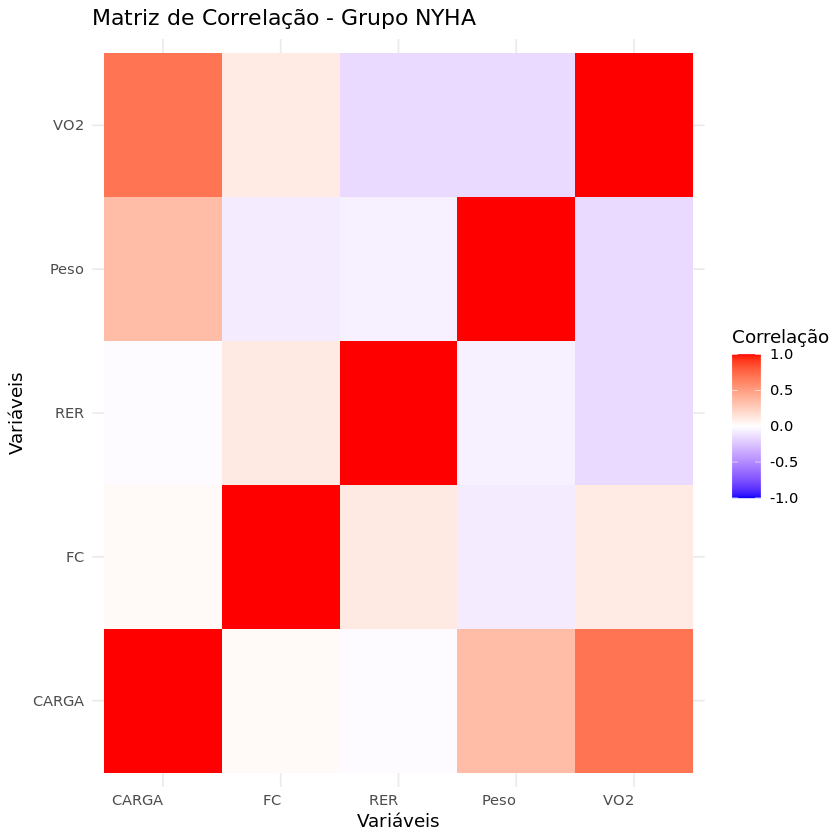

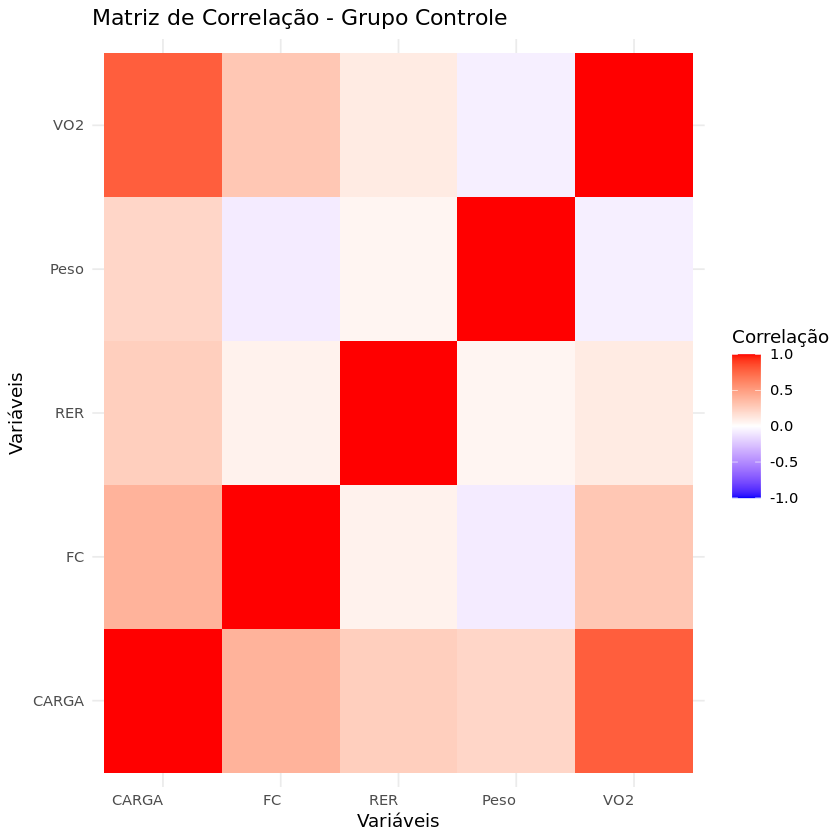

In [104]:

cor_nyha_melt <- melt(cor_matrix_nyha)
cor_controle_melt <- melt(cor_matrix_controle)

# Gráfico de Calor para o grupo NYHA
ggplot(cor_nyha_melt, aes(Var1, Var2, fill = value)) + 
  geom_tile() + 
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), name="Correlação") +
  theme_minimal() + 
  ggtitle("Matriz de Correlação - Grupo NYHA") +
  xlab("Variáveis") + 
  ylab("Variáveis") +
  theme(axis.text.x = element_text(angle = 360, hjust = 1))

# Gráfico de Calor para o grupo Controle
ggplot(cor_controle_melt, aes(Var1, Var2, fill = value)) + 
  geom_tile() + 
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), name="Correlação") +
  theme_minimal() + 
  ggtitle("Matriz de Correlação - Grupo Controle") +
  xlab("Variáveis") + 
  ylab("Variáveis") +
  theme(axis.text.x = element_text(angle = 360, hjust = 1))


## GRÁFICO BOXPLOT

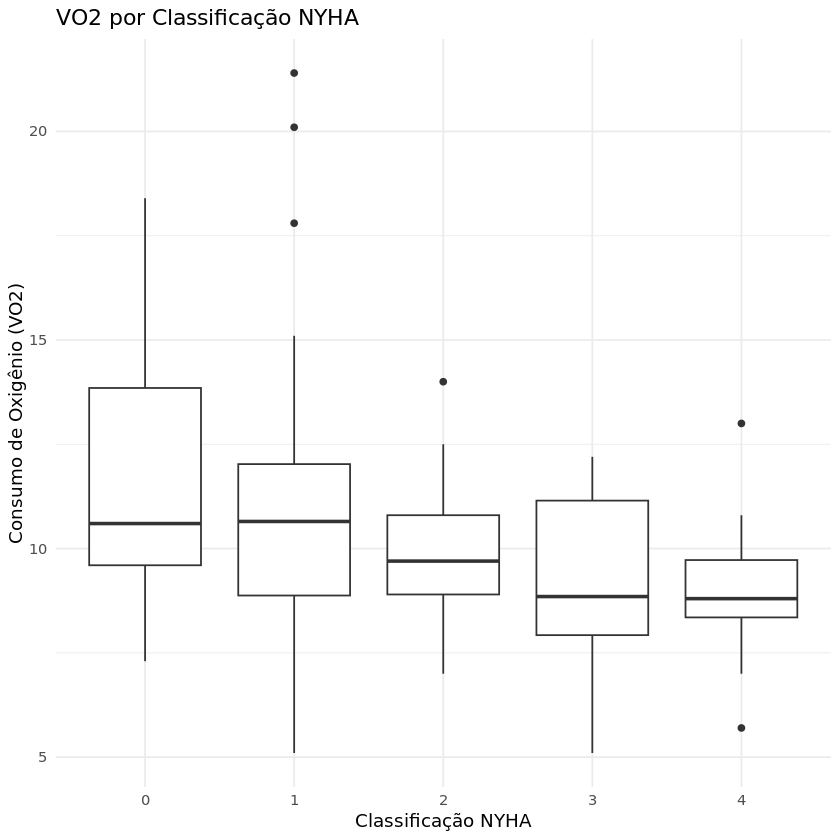

In [105]:
#BOXPLOT
ggplot(db_esforco, aes(x = factor(NYHA), y = VO2)) +
  geom_boxplot() +
  labs(title = "VO2 por Classificação NYHA", x = "Classificação NYHA", y = "Consumo de Oxigênio (VO2)") +
  theme_minimal()